# Randomness

**Prerequisites**

- [Introduction to Numpy](numpy_arrays.ipynb)  
- [Applied Linear Algebra](applied_linalg.ipynb)  


**Outcomes**

- Recall basic probability  
- Able to draw random numbers from numpy  
- Understand why simulation is useful  
- Simulate discrete and continuous random variables and processes  

## Randomness in our world

(TODO: Insert preamble that describes how data scientists, economists, and
statisticians are forced to view the world in terms of probabilities because we
don’t fully understand the relationships that we are studying.)

We will use the `numpy.random` package to produce randomness in Python

This lecture will present various probability distributions and then use
numpy.random to numerically verify some of the facts associated with them

We import `numpy` as usual

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Probability

Before we move on to learning about how to use Python to generate randomness, we should make sure
that we all agree on some basic concepts of probability

In order to think about the probability of some event occurring, we must understand what possible
events could occur – mathematicians refer to this as the *event space*

Some examples are

- For a coin flip, the coin could either come up heads, tails or land on its side  
- The number of inches of rain falling in a certain location and on a given day could be any real
  number between 0 and $ \infty $  
- The change in the price of a stock from the S&P500 could be any real number between
  $ -`opening price and :math: $infty`  
- An individual’s employment status tomorrow could either be employed or unemployed  
- And the list goes on…  


Notice that in some of these cases the event space can be counted (coin flip and employment status)
while in others the event space can not be counted (rain and stock prices)

We refer to random variables that have a countable event space as *discrete
random variables* and random variables who have an uncountable event space as
*continuous random variables*

We associate certain numbers that we’ll call probabilities with events from the event space

We require various things to be true about probabilities

1. The probability of any event must be greater than or equal to 0  
1. The probability of all events must sum (or integrate) to 1  
1. If two events cannot occur at same time then the probability that at least one of them occurs is
  the sum of the probabilities that each one occurs  


We won’t rely on these for much of what we learn in this class, but occasionally these facts will
help us reason about what is happening

### Simulating randomness in Python

One of the most basic random numbers is a variable that has equal probability of taking any value
between 0 and 1

You may have previously learned about this probability distribution as the
Uniform(0, 1)

Let’s dive right into generating some random numbers

Run the code below multiple times and see what numbers you get

In [2]:
np.random.rand()

0.9301095307668574

We can also generate arrays of random numbers

In [3]:
np.random.rand(25)

array([0.22587558, 0.40113488, 0.38501269, 0.96282306, 0.84011636,
       0.90354017, 0.31877873, 0.11581478, 0.13993566, 0.68774122,
       0.54072469, 0.88419923, 0.84200848, 0.4136247 , 0.97905147,
       0.78365769, 0.62997459, 0.52613772, 0.88450458, 0.91975764,
       0.56063079, 0.23517235, 0.20395286, 0.90889866, 0.91611614])

In [4]:
np.random.rand(5, 5)

array([[0.39196354, 0.08843824, 0.42466767, 0.76494863, 0.16750313],
       [0.92171114, 0.85412168, 0.42853347, 0.47053977, 0.84313531],
       [0.23854402, 0.04315069, 0.1048534 , 0.51485353, 0.20490493],
       [0.83777417, 0.64426556, 0.62860686, 0.69442149, 0.87262549],
       [0.15884791, 0.10382184, 0.70627858, 0.74290395, 0.50555725]])

In [5]:
np.random.rand(2, 3, 4)

array([[[0.2374266 , 0.57822156, 0.54386368, 0.71729679],
        [0.60850164, 0.20121976, 0.11985409, 0.88337247],
        [0.29593641, 0.67694286, 0.17878937, 0.7269207 ]],

       [[0.58528724, 0.10065085, 0.8438808 , 0.57980119],
        [0.16296308, 0.2154751 , 0.52027589, 0.66617519],
        [0.36011763, 0.99058526, 0.09736183, 0.93695926]]])

### Why do we need randomness?

As economists and data scientists we study complex systems

These systems have inherent randomness, but they do not readily reveal their underlying distribution to us

In cases where we face this type of difficulty, we turn to a set of tools known
as Monte Carlo methods

These methods effectively boil down to repeatedly simulating some event (or
events) and looking at the distribution of outcomes

This is used to inform decisions in search and rescue missions, election
predictions, sports, and even by the Federal Reserve

The reasons that these types of methods work is a mathematical theorem known as
the *Law of Large Numbers*

The Law of Large Numbers basically says that as the number of times that we
simulate some event goes to infinity that the outcomes will mimic the true
distribution

We already know how the uniform distribution looks, but let’s demonstrate
how we might see the Law of Large Numbers at work in approximating the uniform
distribution

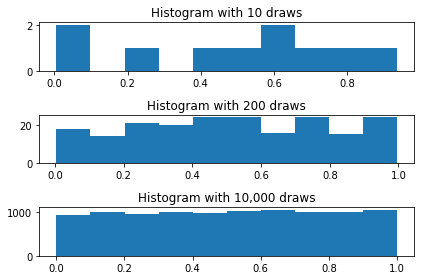

In [6]:
# Draw various numbers of uniform[0, 1] random variables
draws_10 = np.random.rand(10)
draws_200 = np.random.rand(200)
draws_10000 = np.random.rand(10_000)

# Plot their histograms
fig, ax = plt.subplots(3)

ax[0].set_title("Histogram with 10 draws")
ax[0].hist(draws_10)

ax[1].set_title("Histogram with 200 draws")
ax[1].hist(draws_200)

ax[2].set_title("Histogram with 10,000 draws")
ax[2].hist(draws_10000)

fig.tight_layout()

<blockquote>

**Check for understanding**

Wikipedia, and other credible statistics sources, tell us that the mean and
variance of the Uniform(0, 1) distribution are (1/2, 1/12) respectively

How could we check whether the numpy random numbers approximate these
values?


</blockquote>

### Discrete distributions

Sometimes we will deal with variables of interest that can only take one of a
few possible values

We refer to this type of random variable as a discrete distribution

For example, consider a company that makes small business loans

Imagine that the loan requires a repayment of $ \$25,000 $ and must be repaid 1 year
after the loan was made

The company discounts the future at 5%

Additionally, the loans made are paid back in full with 75% probability,
$ \$12,500 $ of loan is repaid with probability 20%, and no repayment with 5%
probability

How much would the small business loan company be willing to loan small
businesses if they’d like to – on average – break even?

In this case, we can compute this by hand:

The amount repaid, on average, is: $ 0.75(25,000) + 0.2(12,500) + 0.05(0) = 21,250 $

Since we’ll receive that amount in one year, we have to discount it:
$ \frac{1}{1+0.05} 21,250 \approx 20238 $

We can now verify by simulating the outcomes of many loans

In [7]:
# You'll see why we call it `_slow` soon :)
def simulate_loan_repayments_slow(N, r=0.05, repayment_full=25_000.0,
                                  repayment_part=12_500.0):
    repayment_sims = np.zeros(N)
    for i in range(N):
        x = np.random.rand()  # Draw a random number

        # Full repayment 75% of time
        if x < 0.75:
            repaid = repayment_full
        elif x < 0.95:
            repaid = repayment_part
        else:
            repaid = 0.0

        repayment_sims[i] = (1 / (1 + r)) * repaid

    return repayment_sims

print(np.mean(simulate_loan_repayments_slow(25_000)))

20170.952380952378


#### Aside: Vectorized computations

The code above illustrates the concepts we were after, but is much slower than
it needs to be

Below is a version of our function that uses numpy arrays to do the computations
instead of only storing the values

In [8]:
def simulate_loan_repayments(N, r=0.05, repayment_full=25_000.0,
                             repayment_part=12_500.0):
    """
    Simulate present value of N loans given values for discount rate and
    repayment values
    """
    random_numbers = np.random.rand(N)

    # start as 0 -- no repayment
    repayment_sims = np.zeros(N)

    # adjust for full and partial repayment
    partial = random_numbers <= 0.20
    repayment_sims[partial] = repayment_part

    full = ~partial & (random_numbers <= 0.95)
    repayment_sims[full] = repayment_full

    return repayment_sims

np.mean(simulate_loan_repayments(25_000))

21284.0

We’ll quickly demonstrate the difference in time it takes to run both versions
of our function:

In [9]:
%timeit simulate_loan_repayments_slow(250_000)

338 ms ± 40.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
%timeit simulate_loan_repayments(250_000)

8.08 ms ± 825 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


The timings for my computer were 167 ms for `simulate_loan_repayments_slow` and 5.05 ms for `simulate_loan_repayments`

This function is simple enough that both times are acceptable, but the 33x time difference could matter in a more complicated operation

This illustrates a concept called *vectorization*, which is the name we give computations that operate on an entire array at a time

In general numpy code that is *vectorized* will perform better than numpy code that operates on one element at a time

For more information see the [QuantEcon lecture on performance Python](https://lectures.quantecon.org/py/numba.html) code

#### Profitability threshold

Rather than looking for the break even point, we might be interested in the
largest loan size that ensures that in a year where we make 250 loans that we
are profitable with 95% probability

This is something that could be computed by hand, but it is much easier to get an answer through
simulation!

If we simulate 250 loans many times and keep track of what the outcomes look like then we can look
at the the 5th percentile of total repayment to get the loan size needed for 95% probability of
being profitable

```python
def simulate_year_of_loans(N=250, K=1000):

    # Create array where we store the values
    avg_repayments = np.zeros(K)
    for year in range(K):

        repaid_year = 0.0
        n_loans = simulate_loan_repayments(N)
        avg_repayments[year] = n_loans.mean()

    return avg_repayments

loan_repayment_outcomes = simulate_year_of_loans(N=250)

# Think about why we use the 5th percentile of outcomes to compute when we are profitable 95%
# of time
lro_5 = np.percentile(loan_repayment_outcomes, 0.05)

print("The largest loan size such that we were profitable 95% of time is")
print(lro_5)
```


Now let’s consider what we could learn if our loan company had even more detailed information for
how the life of their loans progressed

#### Loan states

Loans can have 3 potential statuses (or states):

1. Repaying: Payments are being made on loan  
1. Delinquency: No payments are currently being made, but they might be made in the future  
1. Default: No payments are currently being made and no more payments will be made in future  


The small business loans company knows the following:

- If a loan is currently in repayment then it continues in repayment with 85% probability, it has a
  10% probability of going into delinquency, and a 5% probability of going into default  
- If a loan is currently in delinquency then it returns to repayment with 25% probability, it has a
  60% probability of staying delinquent, and a 15% probability of going into default  
- If a loan is currently in default then it has a 0% chance of returning to repayment or delinquency
  and a 100% probability of staying in default.  


For simplicity, let’s just imagine that 12 payments are made during the life of a loan even though
this means people who experience delinquency won’t be required to repay their remaining balance

Let’s write the code required to perform this dynamic simulation

In [11]:
def simulate_loan_lifetime(monthly_payment):

    # Create arrays to store outputs
    payments = np.zeros(12)
    # Note: dtype 'U12' means a string with no more than 12 characters
    statuses = np.array(4*["repaying", "delinquency", "default"], dtype="U12")

    # Everyone is repaying during their first month
    payments[0] = monthly_payment
    statuses[0] = "repaying"

    for month in range(1, 12):
        rn = np.random.rand()

        if (statuses[month-1] == "repaying"):
            if rn < 0.85:
                payments[month] = monthly_payment
                statuses[month] = "repaying"
            elif rn < 0.95:
                payments[month] = 0.0
                statuses[month] = "delinquency"
            else:
                payments[month] = 0.0
                statuses[month] = "default"
        elif (statuses[month-1] == "delinquency"):
            if rn < 0.25:
                payments[month] = monthly_payment
                statuses[month] = "repaying"
            elif rn < 0.85:
                payments[month] = 0.0
                statuses[month] = "delinquency"
            else:
                payments[month] = 0.0
                statuses[month] = "default"
        else:  # Default -- Stays in default after it gets there
            payments[month] = 0.0
            statuses[month] = "default"

    return payments, statuses

We can use this model of the world to answer even more questions than the last model!

For example, we can think about things like

- For the defaulted loans, how many payments did they make before going into default?  
- For those who partially repaid, how much was repaid before the 12 months was over?  
- etc…  


Unbeknownst to you, we have just introduced a well known mathematical concept known as a Markov
chain

A Markov chain is a random process (Note: Random process is a sequence of random variables
observed over time) where the probability of something happening tomorrow only depends on what we
can observe today

In our small business loan example, this just means that the small business loan’s repayment status
tomorrow only depended on what its repayment status was today

Markov chains often show up in economics and statistics so we decided a simple introduction would
be helpful, but leave many details to the interested reader

<blockquote>

**Check for understanding**

**TODO** write this exercise


</blockquote>

### Continuous distributions

Recall that a continuous distribution is a distribution where the value can take on an uncountable number of values

It differs from a discrete distribution in the sense that the events are not
countable

We can use simulation to learn things about continuous distributions just like we did with discrete
distributions

Let’s use simulation to study what is arguably the most commonly encountered
distributions – the Normal distribution

The Normal (sometimes referred to as the Gaussian distribution) is bell shaped and is completely
described by the mean and variance of the distribution

The mean is often referred to as $ \mu $ and the variance is often referred
to as $ \sigma^2 $

Let’s take a look at the Normal distribution

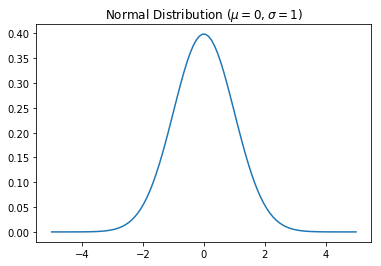

In [12]:
# scipy is an extension of numpy and the stats
# subpackage has lots of tools for working with
# various distributions
import scipy.stats as st

x = np.linspace(-5, 5, 100)
pdf_x = st.norm(0.0, 1.0).pdf(x)

fig, ax = plt.subplots()

ax.set_title(r"Normal Distribution ($\mu = 0, \sigma = 1$)")
ax.plot(x, pdf_x)

<blockquote>

**Check for understanding**

**TODO** write this exercise


</blockquote>